# 1. Decision Trees

### .Iris dataset

## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset

In [7]:
df=pd.read_csv(r"C:\Users\rites\Downloads\iris.csv")

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Preprocessing

In [9]:
#check for null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(3)

In [11]:
data=df.drop_duplicates()


In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
# pair plot   

In [15]:
import seaborn as sns 


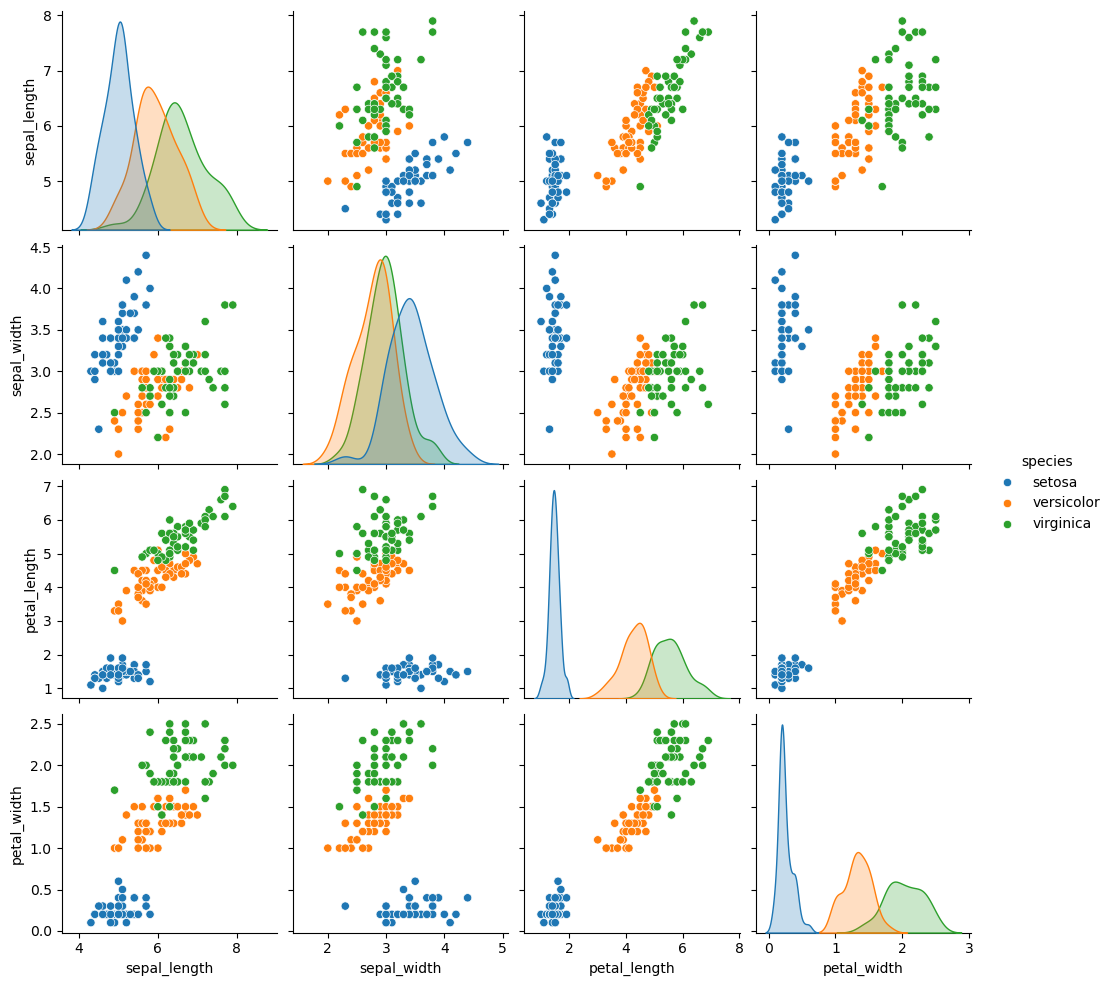

In [16]:
sns.pairplot(data,hue='species')
plt.show()

In [17]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


# Model Builing process

In [18]:
X=data.drop(columns=['species'],axis=1)# Independent variable
y=data['species']#Dependent?target variable

# Split the data into Training(80%) and Test(20%) set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
# size of data

In [22]:
X_train.shape,y_train.shape

((117, 4), (117,))

In [23]:
X_test.shape,y_test.shape

((30, 4), (30,))

# 1.Decision Tree- Gini Index

In [24]:
from sklearn.tree import DecisionTreeClassifier #classification

In [25]:
clf_dt= DecisionTreeClassifier(criterion='gini')

In [26]:
# Train the model
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
# Visualize the tree

In [28]:
from sklearn import tree

In [29]:
data.species.value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

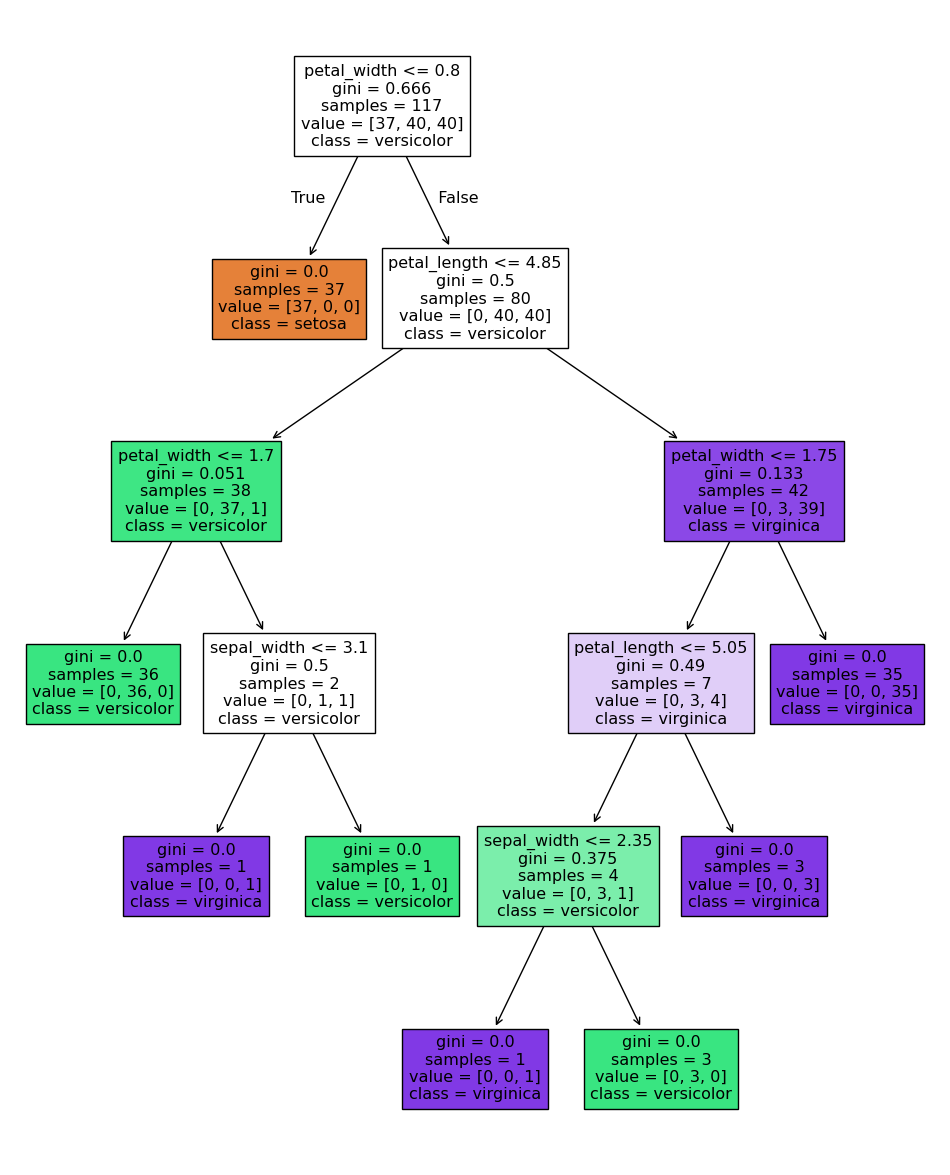

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))

tree.plot_tree(clf_dt,
              feature_names=X.columns,
              class_names=['setosa','versicolor','virginica'],
              filled=True)

plt.show()


# Prediction

In [31]:
y_pred = clf_dt.predict(X_test)

# Model evaluation

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
acc_score= accuracy_score(y_test, y_pred)
print(f'Accuracy Decision Tree is {acc_score:.2f}')

Accuracy Decision Tree is 0.97


In [34]:
print('Confusion Matrix:')
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [35]:
print('Classification Report')
clf_report=classification_report(y_test,y_pred)
print(clf_report)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# 2.Decision Tree using entropy

In [36]:
clf_dt_2 = DecisionTreeClassifier(criterion='entropy')

In [37]:
# train the model
clf_dt_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

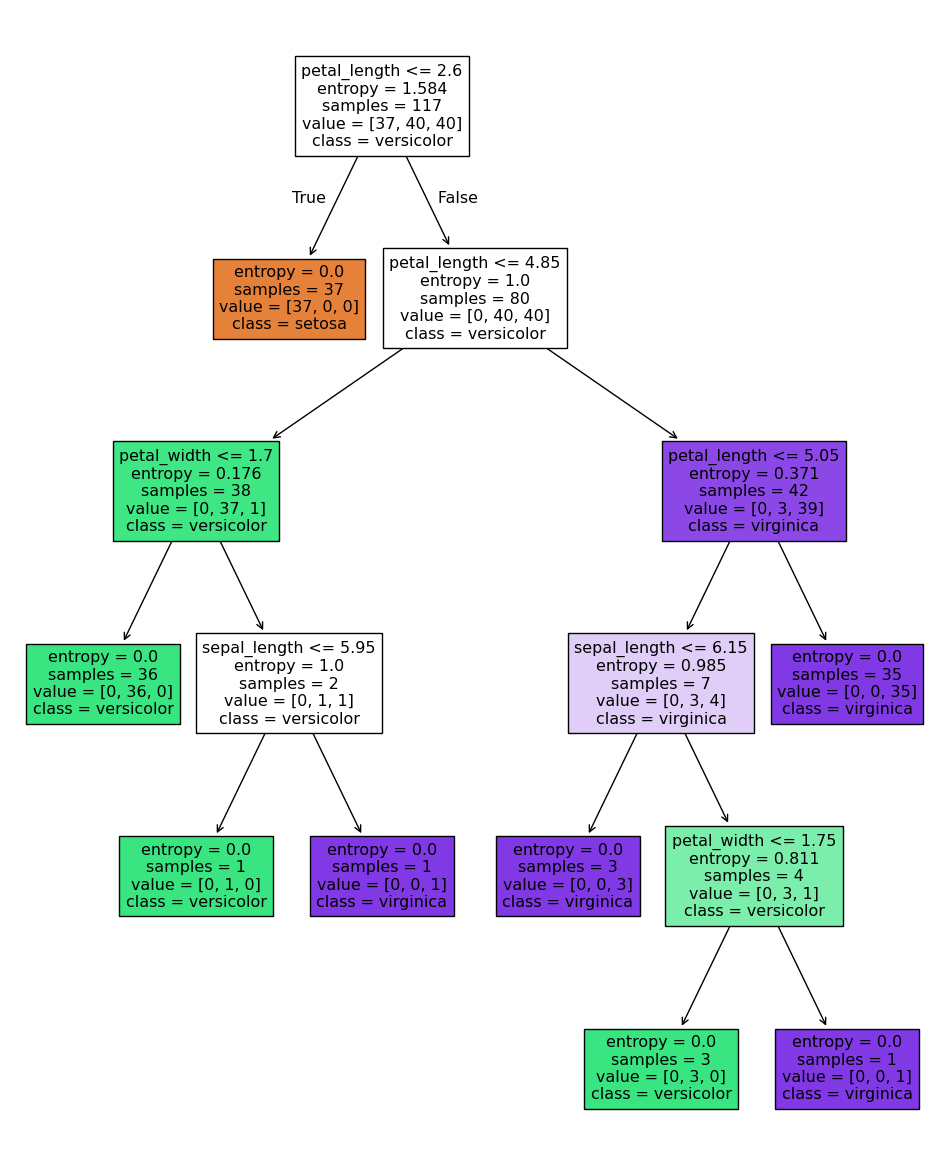

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))

tree.plot_tree(clf_dt_2,
              feature_names=X.columns,
              class_names=['setosa','versicolor','virginica'],
              filled=True)

plt.show()

In [39]:
y_pred= clf_dt_2.predict(X_test)

# Model Evaluation

In [40]:
acc_Score= accuracy_score(y_test,y_pred)
print(f'Accuracy Score is {acc_Score}')

Accuracy Score is 0.9333333333333333


In [41]:
print('Confusion Matrix:')
conf_mtx = confusion_matrix(y_test,y_pred)
print(conf_mtx)

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [42]:
print('Classification Report')
class_report= classification_report(y_test,y_pred) 
print(class_report)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Ensemble Approach

# 2.Random forest - Bagging / Bootstrap aggregation

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_rf = RandomForestClassifier(n_estimators=350,criterion='gini', oob_score=True)
# oob score is for validation data

In [45]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, oob_score=True)

# Predict

In [46]:
y_pred = model_rf.predict(X_test)

# Model Evaluation

In [47]:
acc_score = accuracy_score(y_test,y_pred)
print(f'Accuracy:{acc_score :.2f}')

Accuracy:0.93


In [48]:
# the model validation score
model_rf.oob_score_

0.9572649572649573

In [49]:
print('Confusion Matrix:')
conf_mtx=confusion_matrix(y_test,y_pred)
print(conf_mtx)

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [50]:
print('Classification Report')
class_rpt= classification_report(y_test,y_pred)
print(class_rpt)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Feature Importance

### 1. Decision Tree Feature Importance

In [51]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [52]:
print('Feature Importance of Decision Tree - Gini index')
pd.Series(clf_dt.feature_importances_, index= X.columns)

Feature Importance of Decision Tree - Gini index


sepal_length    0.000000
sepal_width     0.032072
petal_length    0.441441
petal_width     0.526486
dtype: float64

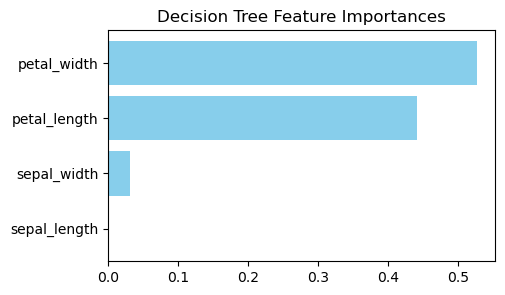

In [53]:
plt.figure(figsize=(5,3))
plt.barh(X.columns,clf_dt.feature_importances_, color='skyblue')
plt.title('Decision Tree Feature Importances')
plt.show()


### 2. Feature Imoportance for random forest

In [54]:
print('Random forest feature importance')
pd.Series(model_rf.feature_importances_,index=X.columns)

Random forest feature importance


sepal_length    0.110545
sepal_width     0.020193
petal_length    0.468718
petal_width     0.400543
dtype: float64

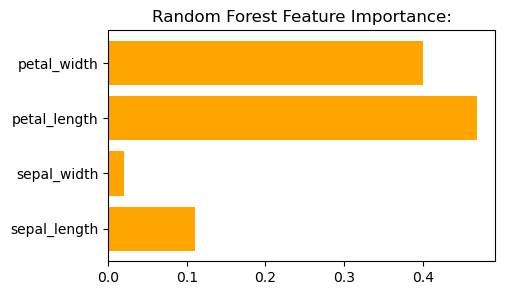

In [55]:
plt.figure(figsize=(5,3))
plt.barh(X.columns,model_rf.feature_importances_,color='orange')
plt.title('Random Forest Feature Importance:')
plt.show()

# 3. Boosting - Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
model_gb = GradientBoostingClassifier(n_estimators=110,verbose=2)

In [58]:
# Train the model
model_gb.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9134            0.79s
         2           0.7714            0.52s
         3           0.6545            0.42s
         4           0.5590            0.37s
         5           0.4799            0.33s
         6           0.4147            0.32s
         7           0.3602            0.32s
         8           0.3129            0.31s
         9           0.2726            0.30s
        10           0.2383            0.29s
        11           0.2088            0.29s
        12           0.1833            0.29s
        13           0.1612            0.28s
        14           0.1417            0.28s
        15           0.1247            0.27s
        16           0.1100            0.26s
        17           0.0976            0.26s
        18           0.0865            0.25s
        19           0.0767            0.25s
        20           0.0682            0.25s
        21           0.0606            0.24s
        2

GradientBoostingClassifier(n_estimators=110, verbose=2)

## Prediction

In [59]:
y_pred = model_gb.predict(X_test)

## Model Evaluation

In [61]:
acc_score = accuracy_score(y_test,y_pred)
print(f'Accuracy Score is {acc_score:.2f}')

Accuracy Score is 0.93


In [62]:
print('Confusion matrix:')
conf_mtx = confusion_matrix(y_test,y_pred)
print(conf_mtx)

Confusion matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [63]:
print('Classification Report:')
class_report = classification_report(y_test,y_pred)
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Feature importance by gradient boosting

In [64]:
print('Gradient Boostong feature importance:')
pd.Series(model_gb.feature_importances_, index= X.columns )

Gradient Boostong feature importance:


sepal_length    0.004610
sepal_width     0.014685
petal_length    0.699025
petal_width     0.281680
dtype: float64

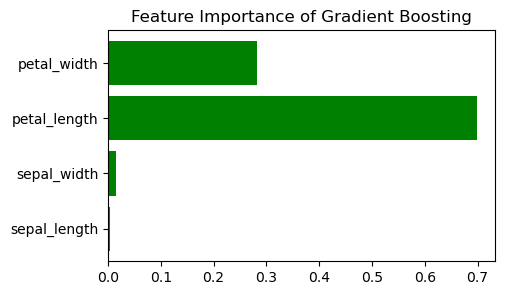

In [66]:
plt.figure(figsize=(5,3))

plt.barh(X.columns,model_gb.feature_importances_, color='green')
plt.title('Feature Importance of Gradient Boosting')
plt.show()